## QLearning

Q-learning is a model-free reinforcement learning algorithm. The goal of Q-learning is to learn a policy, which tells an agent what action to take under what circumstances. It does not require a model (hence the connotation "model-free") of the environment, and it can handle problems with stochastic transitions and rewards, without requiring adaptations.

For any finite Markov decision process (FMDP), Q-learning finds a policy that is optimal in the sense that it maximizes the expected value of the total reward over any and all successive steps, starting from the current state.

Source: https://en.wikipedia.org/wiki/Q-learning

## Looking at the Problem

Suppose we have 5 rooms in a building connected by doors as shown in the figure below.  We'll number each room 0 through 4.  The outside of the building can be thought of as one big room (5).  Notice that doors 1 and 4 lead into the building from room 5 (outside).
For this example, we'd like to put an agent in any room, and from that room, go outside the building (this will be our target room). In other words, the goal room is number 5.

!["A Simple Network Problem"](rooms_house.PNG)

Source: http://mnemstudio.org/ai/path/images/modeling_environment_clip_image002a.gif

A Graph Representation

![Graph Representation](rooms_graph.PNG)

Source: http://mnemstudio.org/ai/path/images/map1a.gif

Reward System

!["A reward network"](rewards.PNG)

Source: http://mnemstudio.org/ai/path/images/map2a.gif

Building the Reward Matrix

!["Reward Matrix"](reward_matrix.PNG)

Source: http://mnemstudio.org/ai/path/images/r_matrix1.gif

The Q Learning Algorithm, building the Q -Matrix

1. Set the gamma parameter(learning rate), and  rewards in matrix R.

2. Initialize matrix Q to zero.

3. For each episode:

    Select a random initial state.

    Do While the goal state has not been reached.

        * Select one among all possible actions for the current state.
        ** Using this possible action, consider going to the next state.
        *** Get maximum Q value for this next state based on all possible actions.
        **** Compute: Q(state, action) = R(state, action) + Gamma * Max[Q(next state, all actions)]
        ***** Set the next state as the current state.
    End Do

End For

Source: http://mnemstudio.org/path-finding-q-learning-tutorial.htm

!["formula"](new-q-value-formula.png)

## importing libraries

In [6]:
#Numpy is a package to support doing matrix multiplications
import numpy as np
#Pylab is a package that provides a set of utilities and interfaces to process laboratory data
import pylab as plt
#Networkx a package to support creating network graphs
import networkx as nx

#To install them run
#pip install numpy
#pip install pylab
#pip install networkx

## generating the network for the problem

In [7]:
# map cell to cell, add circular cell to goal point
points_list = [(0,4),(4,0),(4,3),(4,5),(3,4),(3,2),(3,1),(2,3),(1,3),(1,5),(5,1),(5,4),(5,5)]

#setting the goal
goal = 5

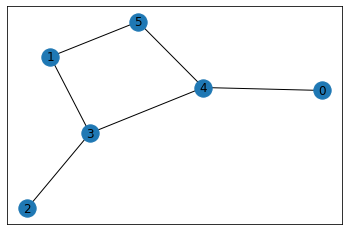

In [9]:
# generate the network from the points list
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

## Implementing the algorithm

In [10]:
#1. Set the gamma parameter, and environment rewards in matrix R.
# set the learning rate (gamma)
gamma = 0.8

#initialize the reward matrix X
MATRIX_SIZE = 6
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

#change the values to be 0 if it is a viable path and 100 if it is a goal path
for point in points_list:
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

print(R)

[[ -1.  -1.  -1.  -1.   0.  -1.]
 [ -1.  -1.  -1.   0.  -1. 100.]
 [ -1.  -1.  -1.   0.  -1.  -1.]
 [ -1.   0.   0.  -1.   0.  -1.]
 [  0.  -1.  -1.   0.  -1. 100.]
 [ -1.   0.  -1.  -1.   0. 100.]]


In [11]:
# 2. Initialize matrix Q to zero.
#create the Q-learning matrix which will hold all the lessons learned
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
print(Q)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [12]:
#creating some helper functions

# available_actions returns the possible movements from a given point
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

# sample_next_action chooses randomly the next move based on the list of possible moves
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

#update updates the current state with the next move, updating the Q-learning matrix in the process
# Q(state, action) = R(state, action) + Gamma * Max[Q(next state, all actions)]
def update(current_state, action, gamma):
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]

    Q[current_state, action] = R[current_state, action] + gamma * max_value
#     print('max_value', R[current_state, action] + gamma * max_value)

    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)

## Training

Trained Q matrix:
[[  0.           0.           0.           0.          80.
    0.        ]
 [  0.           0.           0.          64.           0.
  100.        ]
 [  0.           0.           0.          64.           0.
    0.        ]
 [  0.          80.          51.1981069    0.          79.99704203
    0.        ]
 [ 63.99763362   0.           0.          63.99763362   0.
  100.        ]
 [  0.          79.99704203   0.           0.          79.99704203
  100.        ]]


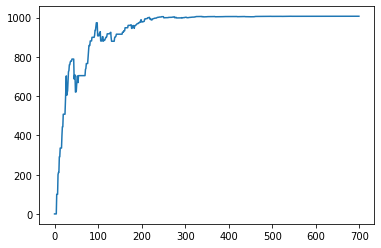

In [13]:
episodes = 700 
scores = []
for i in range(episodes):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)


print("Trained Q matrix:")
#Lets normalize Q (i.e.; converte into percentage) by dividing all non-zero entries by the highest number
print(Q/np.max(Q)*100)

#check the learning progress
plt.plot(scores)
plt.show()

## Testing 

In [15]:
initial_state =2
current_state = initial_state
steps = [current_state]

while current_state != goal:

    next_step_index = np.where(Q[current_state,]
        == np.max(Q[current_state,]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

Most efficient path:
[2, 3, 1, 5]


## References

This example and code was inspired on the following content

Manuel Amunategui, 
video (  https://www.youtube.com/watch?v=nSxaG_Kjw_w )
article ( https://www.viralml.com/video-content.html?v=nSxaG_Kjw_w )

Mic 
article ( https://firsttimeprogrammer.blogspot.com/2016/09/getting-ai-smarter-with-q-learning.html )

Unknown
article ( http://mnemstudio.org/path-finding-q-learning-tutorial.htm )
